# Dask Array

The dask array provides a subset of the NumPy API for working on ndarrays in parallel.

In [38]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import dask.array as da

Let's calculate a simple dot product between 2 numpy arrays.

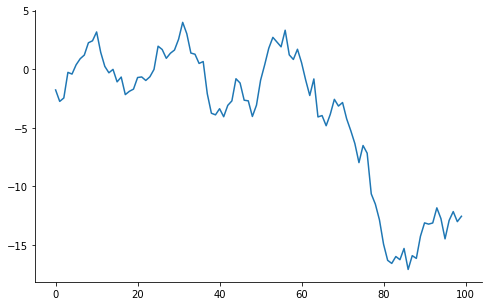

In [50]:
narray = np.random.normal(size=(100, 5))
narray = np.cumsum(narray, axis=0)
weights = np.random.normal(size=5)
timeseries = (narray @ weights)

fig, ax = plt.subplots(figsize=(8, 5))

ax.plot(timeseries)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

Below we can apply the exact same calculation using dask array.

In [64]:
darray = da.random.normal(size=(100, 5), chunks=10)
darray = da.cumsum(darray, axis=0)
dweights = da.random.normal(size=5, chunks=1)

darray

dask.array<cumsum-axis=0, shape=(100, 5), dtype=float64, chunksize=(10, 5)>

Let's add the dot product to the task graph and visualize the computation.

In [65]:
ddot = darray @ dweights

ddot.visualize()

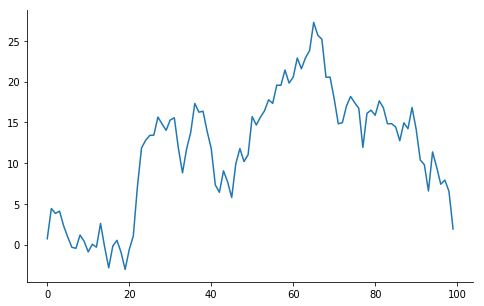

In [66]:
timeseries = ddot.compute()

fig, ax = plt.subplots(figsize=(8, 5))

ax.plot(timeseries)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)